In [314]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [316]:
df = pd.read_csv("../data/raw/airbnbnyc2025.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20250617032754,2025-06-17,city scrape,Superfast Wi-Fi. Clean & quiet home by the park,"Bright, serene room in a renovated apartment h...",Close to Prospect Park and Historic Ditmas Park,https://a0.muscache.com/pictures/hosting/Hosti...,2787,...,5.0,4.75,4.88,NaN,f,6,1,5,0,0.08
1,2595,https://www.airbnb.com/rooms/2595,20250617032754,2025-06-17,city scrape,Skylit Midtown Manhattan Spacious Studio,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/hosting/Hosti...,2845,...,4.8,4.81,4.40,NaN,f,3,3,0,0,0.26
2,5136,https://www.airbnb.com/rooms/5136,20250617032754,2025-06-17,city scrape,Spacious Family Friendly Duplex w/ Patio + Yard,"We welcome you to stay in our lovely 2 br, 130...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.0,4.75,4.75,NaN,t,1,1,0,0,0.03
3,6848,https://www.airbnb.com/rooms/6848,20250617032754,2025-06-17,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,4.8,4.69,4.58,NaN,f,1,1,0,0,1.00
4,6872,https://www.airbnb.com/rooms/6872,20250617032754,2025-06-17,previous scrape,Uptown Sanctuary w/ Private Bath (Month to Month),This charming distancing-friendly month-to-mon...,This sweet Harlem sanctuary is a 10-20 minute ...,https://a0.muscache.com/pictures/miso/Hosting-...,16104,...,5.0,5.00,5.00,NaN,f,2,0,2,0,0.03


In [317]:
df.shape

(36322, 79)

In [318]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 79, dtype: object

In [320]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

checking null values in price column

In [325]:
df['price'].isnull().sum()

np.int64(14863)

Since price has a lot of null values which is our target column dopping the null values

In [328]:
df.dropna(subset=['price'], inplace=True)

checking values in price column

In [331]:
df['price'].unique()

array(['$285.00', '$240.00', '$215.00', ..., '$1,643.00', '$8.00',
       '$993.00'], dtype=object)

Cleaning Price column and converting to float

In [334]:
df['price'] = df['price'].str.replace('[$,]', '', regex=True).astype(float)

Adding a new column with total number of amenities

In [337]:
df['total_amenities'] = df['amenities'].apply(len)


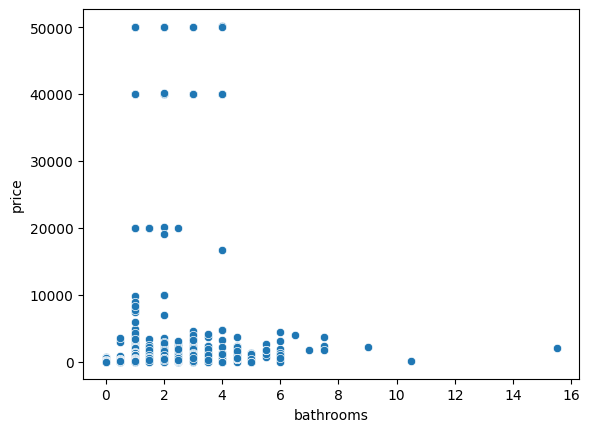

In [339]:
sns.scatterplot(data=df, x='bathrooms', y='price')
plt.show()

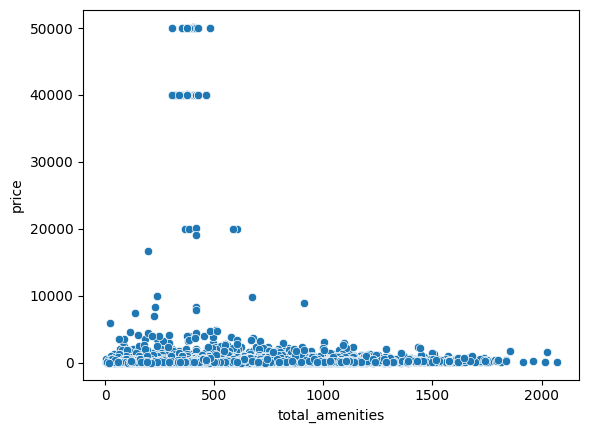

In [341]:
sns.scatterplot(data=df, x='total_amenities', y='price')
plt.show()

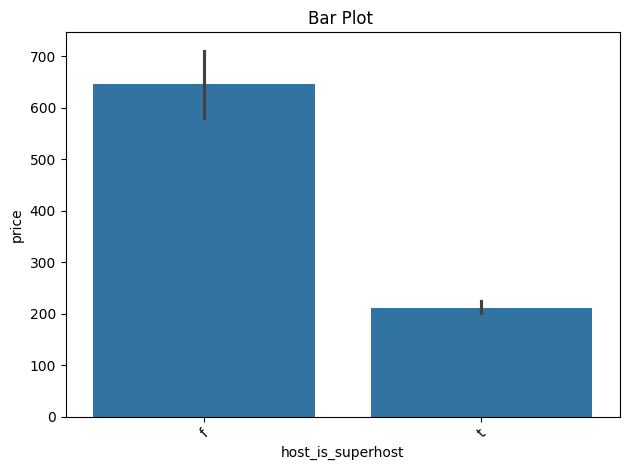

In [343]:

sns.barplot(data=df, x='host_is_superhost', y='price', estimator='mean') 
plt.title("Bar Plot ")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

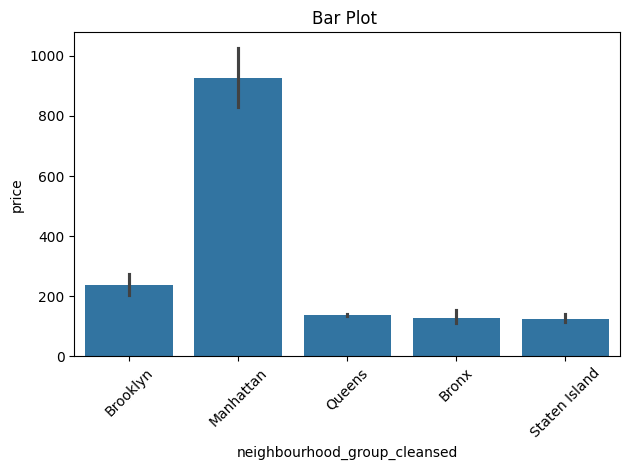

In [345]:

sns.barplot(data=df, x='neighbourhood_group_cleansed', y='price', estimator='mean') 
plt.title("Bar Plot ")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

Dropping scrapping info columns 'id','listing_url','scrape_id','last_scraped' and some other columns which are incomplete or similar info.

In [348]:

df.drop(['host_since','host_listings_count','license','host_identity_verified','neighbourhood','host_verifications','description','host_response_time',
         'host_response_rate','host_neighbourhood','host_total_listings_count', 'host_acceptance_rate',
         'id','listing_url','scrape_id','last_scraped','source','neighborhood_overview','picture_url','host_url',
         'host_name','host_about','host_location','host_thumbnail_url','host_picture_url','host_has_profile_pic',
         'calendar_last_scraped','bathrooms_text' ,'minimum_minimum_nights',
         'maximum_minimum_nights', 'minimum_maximum_nights',
         'beds', 'amenities','number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_eoy',
         'number_of_reviews_ly', 'estimated_occupancy_l365d',
         'estimated_revenue_l365d', 'first_review', 'last_review',
         'maximum_maximum_nights', 'minimum_nights_avg_ntm',
         'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability','instant_bookable','availability_30', 
         'availability_60', 'availability_90', 'calculated_host_listings_count_entire_homes',
         'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
         'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
         'review_scores_communication', 'review_scores_location','review_scores_rating',
         'review_scores_value','bathrooms','minimum_nights'],axis=1, inplace=True)

In [350]:
df.isna().sum()

name                                 0
host_id                              0
host_is_superhost                  394
neighbourhood_cleansed               0
neighbourhood_group_cleansed         0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bedrooms                            82
price                                0
maximum_nights                       0
availability_365                     0
number_of_reviews                    0
calculated_host_listings_count       0
reviews_per_month                 6333
total_amenities                      0
dtype: int64

In [352]:
df['reviews_per_month'].fillna(0,inplace=True)
df['bedrooms'].fillna(0,inplace=True)
df['host_is_superhost'].fillna('No info available',inplace=True)

C:\Users\sheri\AppData\Local\Temp\ipykernel_22300\2338834235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0,inplace=True)
C:\Users\sheri\AppData\Local\Temp\ipykernel_22300\2338834235.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [354]:
df.isna().sum()

name                              0
host_id                           0
host_is_superhost                 0
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bedrooms                          0
price                             0
maximum_nights                    0
availability_365                  0
number_of_reviews                 0
calculated_host_listings_count    0
reviews_per_month                 0
total_amenities                   0
dtype: int64

In [356]:
df.shape

(21459, 18)

In [358]:
df.to_csv('../data/clean/airbnbnyc_cleaned.csv', index=False)
